In [1]:
!pip install tifffile
!pip install opencv-python
!pip install rasterio
!pip install scipy==1.7.3
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.7.3-cp310-cp310-win_amd64.whl (34.3 MB)
  Using cached numpy-1.22.4-cp310-cp310-win_amd64.whl (14.7 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


Defaulting to user installation because normal site-packages is not writeable


Since images were stored in tar.gz files, their compression algorithm was changed to adobe_deflate instead of LZW. Adobe_deflate does not work in pytorch tensors. To remedy:

1. install imageMagick
2. open command line and navigate to the directory where imageMagick was installed
3. make sure to backup the train and test folders elsewhere
3. enter: magick mogrify -compress LZW "C:\Users\Axl Wynants\Automate-Image-Annotation-for-Decision-Support-Systems\train\image\*.tiff" (change file path as needed)
4. .tiff images in the train/image folder are now changed to LZW compression and we can proceed

In [80]:
import numpy as np
import pandas as pd
import os
import tifffile
import torch 
import imageio
import cv2
import matplotlib.pyplot as plt
from skimage import io,img_as_float
from torchvision.transforms import ToTensor
import rasterio
from rasterio.plot import show
from PIL import Image
from torchvision.transforms import ToTensor

# Open TIFF image using PIL
image = Image.open("train/image/DLBCL10_20200513_20R-Scene-34-ScanRegion33_S0M1_DAPI.tiff")
workingimage = Image.open("C:/Users/Axl Wynants/Desktop/Statistics/2Ma/Thesis/Images/Milan_Raw/Milan_raw/01_raw/AIH_scene01_02R_Cy5_CD68.tif")
convertedimage = Image.open("train/image_lzw.tiff")


# Now you can use ToTensor
from torchvision.transforms import ToTensor
tensor_image = ToTensor()(convertedimage)

In [87]:
print(tensor_image)

tensor([[[ 8563,  9643, 10581,  ...,   261,   229,   251],
         [ 7174,  9551, 10178,  ...,   198,   210,   254],
         [ 9486, 12314, 11628,  ...,   259,   202,   254],
         ...,
         [ 2570,  4225, 10599,  ...,   304,   305,   250],
         [ 3194,  3906,  9768,  ...,   241,   281,   238],
         [ 4236,  3914,  7413,  ...,   269,   260,   297]]], dtype=torch.int16)


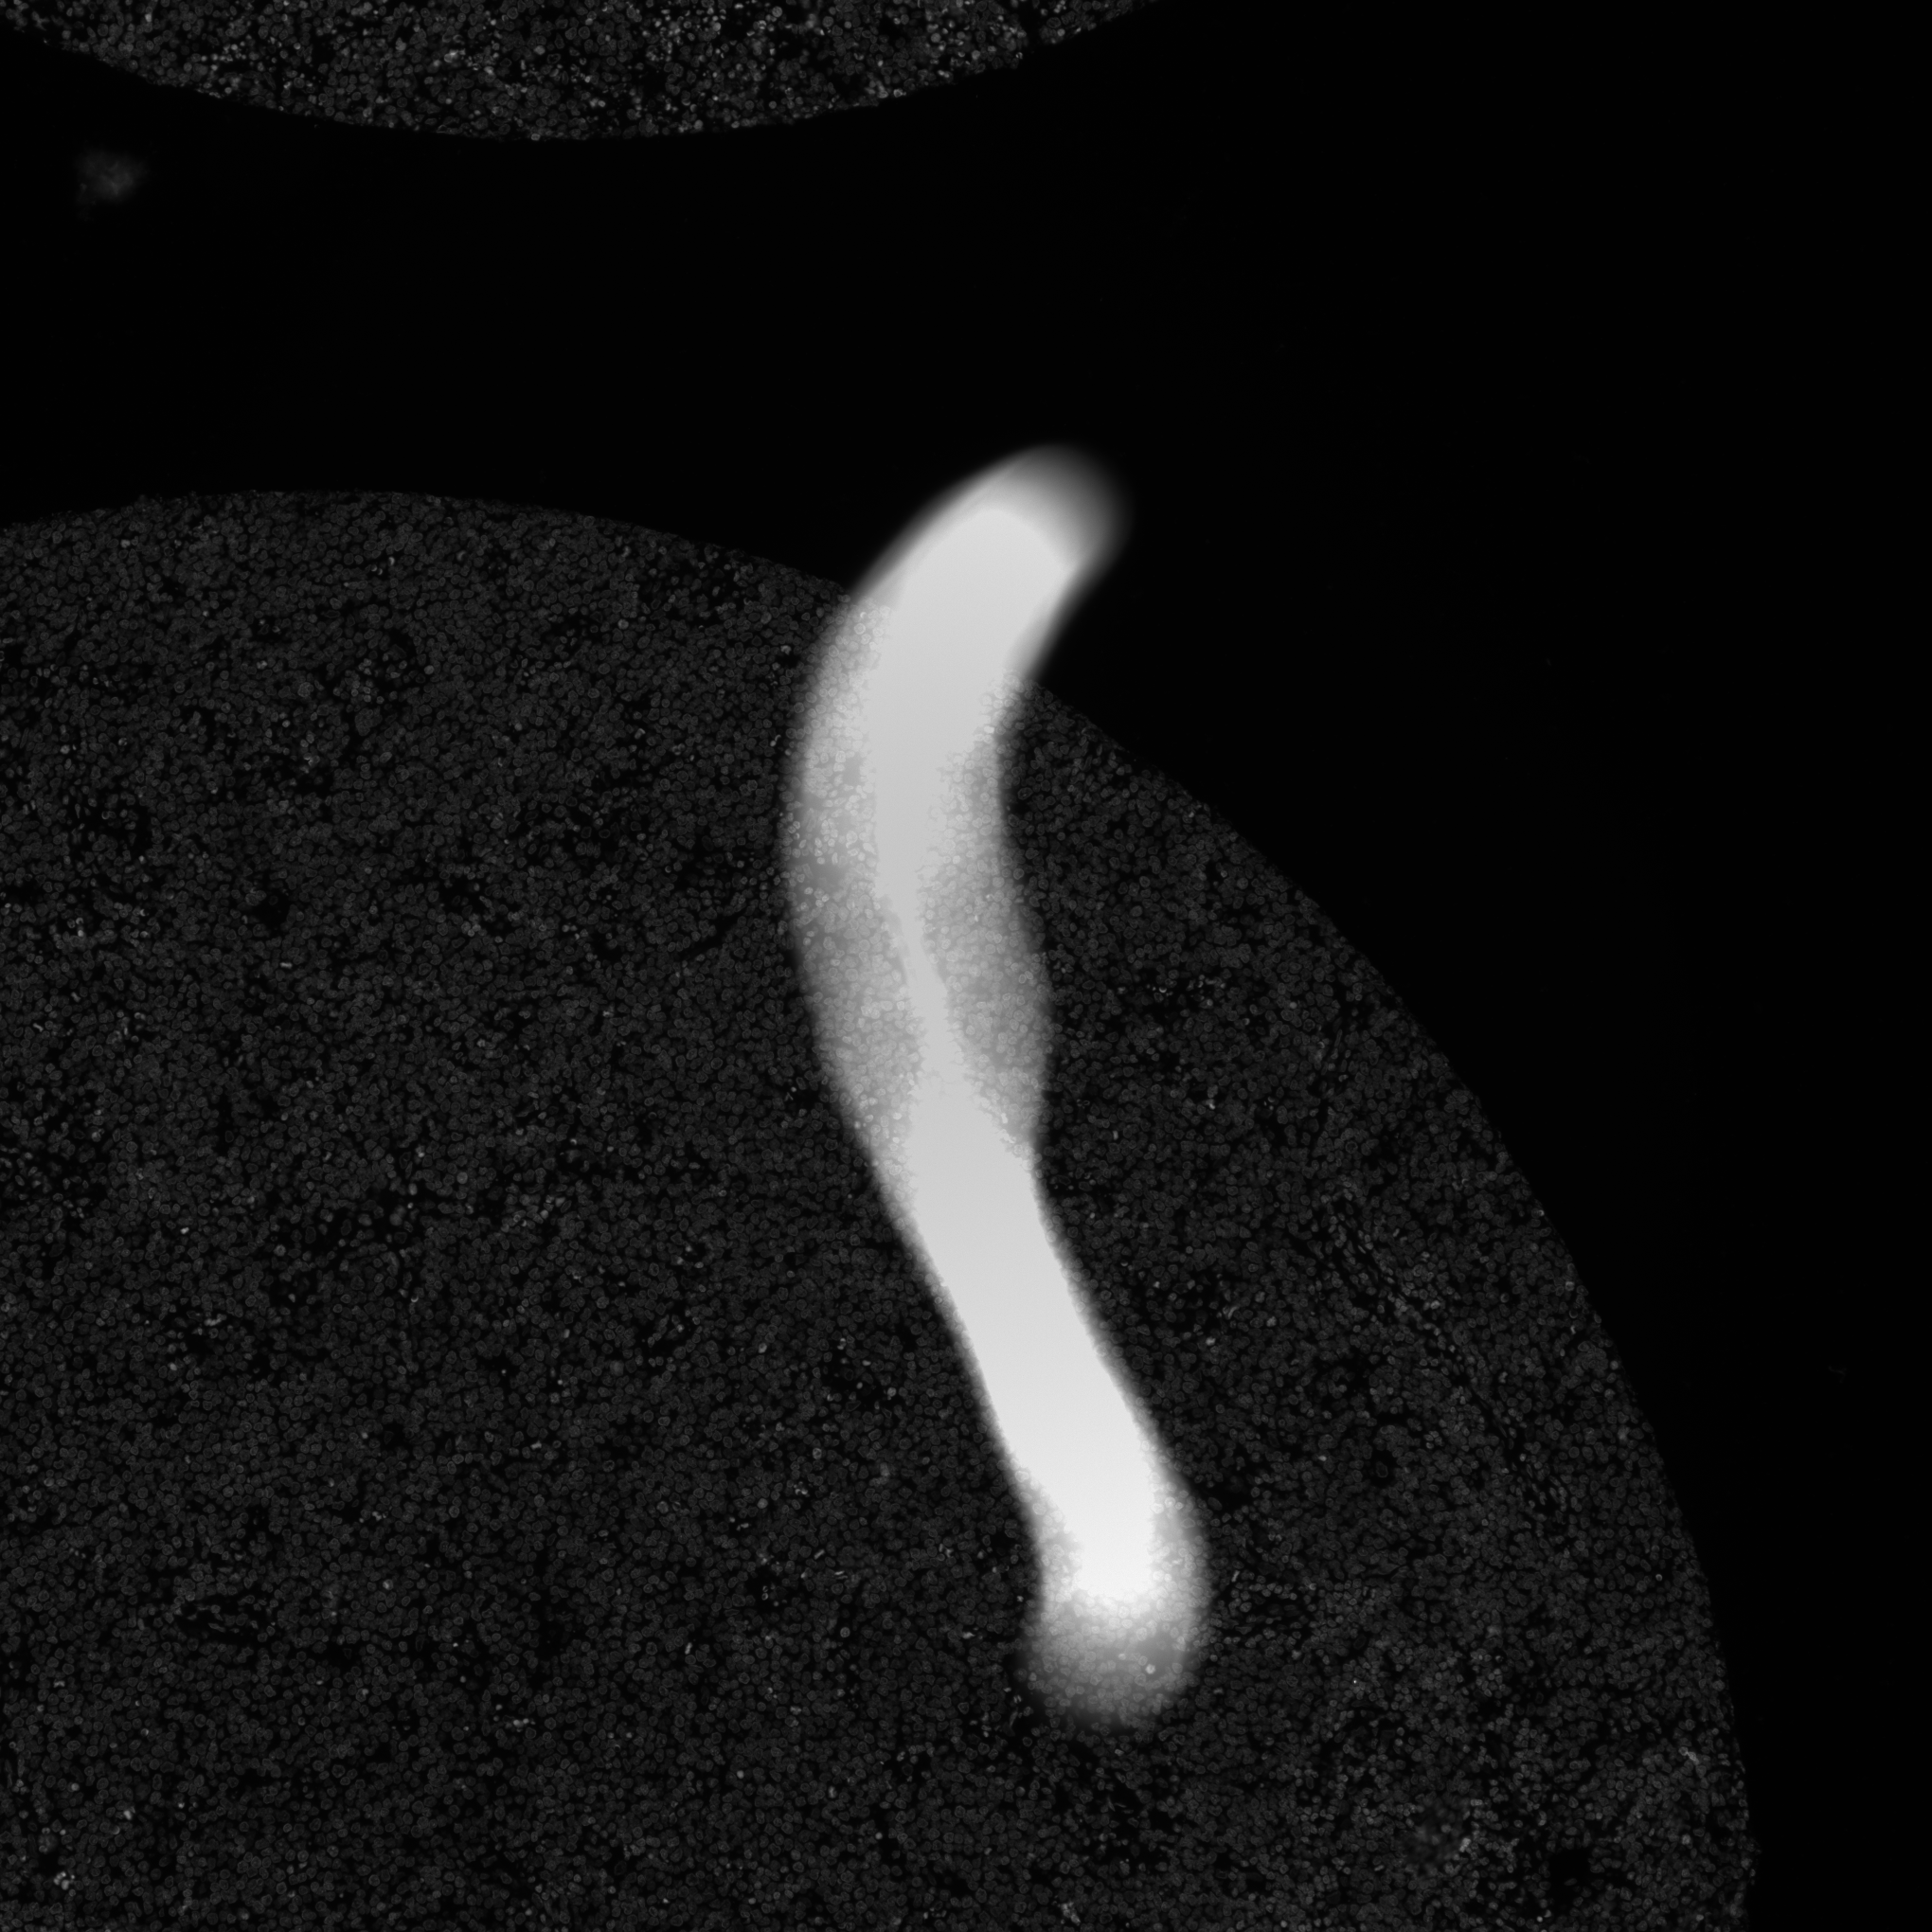

In [89]:
convertedimage

In [120]:
def read_images_from_folder(folder_path):
    artifacts1 = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.tif') or filename.endswith('.tiff'):
            # Read the TIFF image using tifffile
            image_path = os.path.join(folder_path, filename)
            tiff_image = tifffile.imread(image_path)
            
            # Convert the image to PyTorch tensor
            tensor_image = torch.from_numpy(tiff_image.astype(np.float32))  # Convert to float32 tensor
            tensor_image = tensor_image.unsqueeze(0)  # Add batch dimension
            
            # Append the tensor to the list of images
            artifacts1.append(tensor_image)
    return artifacts1

# Example usage
folder_path = 'train/image'
artifacts1 = read_images_from_folder(folder_path)

# Now 'images' is a list of PyTorch tensors, each representing one image from the folder


In [121]:
artifacts1[0]

tensor([[[ 704.,  670.,  664.,  ..., 2263., 2894., 3601.],
         [ 723.,  796.,  694.,  ..., 2437., 3240., 3859.],
         [ 636.,  715.,  714.,  ..., 1911., 2259., 2612.],
         ...,
         [ 811.,  731.,  729.,  ..., 1057., 1147., 1106.],
         [ 666.,  760.,  671.,  ..., 1182., 1036., 1142.],
         [ 762.,  711.,  765.,  ..., 1117., 1105., 1113.]]])

In [98]:
non_zero_count = torch.count_nonzero(artifacts1[100]).item()
print("Number of non-zero elements:", non_zero_count)

Number of non-zero elements: 4161600


In [102]:
artifacts1[0].shape

torch.Size([1, 2040, 2040])

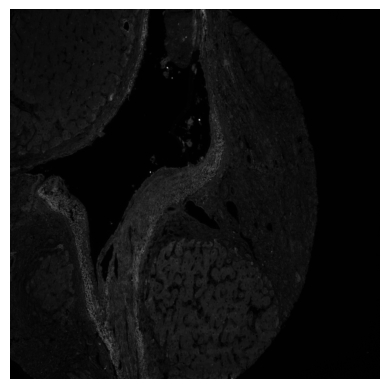

In [99]:
image=artifacts1[102]
plt.imshow(image[0], cmap='gray')  # cmap='gray' for grayscale images
plt.axis('off')  # Hide axes
plt.show()

In [113]:
folder_path2 = 'test/image'
artifacts2 = read_images_from_folder(folder_path2)

In [104]:
artifacts2[0].shape

torch.Size([1, 2040, 2040])

In [105]:
artifacts2[0]

tensor([[[ 723.,  790.,  767.,  ...,  791.,  855.,  852.],
         [ 747.,  675.,  709.,  ...,  801.,  781.,  784.],
         [ 717.,  685.,  719.,  ...,  784.,  809.,  705.],
         ...,
         [ 780.,  692.,  612.,  ..., 1276., 1275., 1259.],
         [ 703.,  705.,  726.,  ..., 1131., 1314., 1344.],
         [ 738.,  713.,  725.,  ..., 1144., 1142., 1233.]]])

In [106]:
folder_path3 = 'No_Artifacts'
noartifact = read_images_from_folder(folder_path3)

In [124]:
artifact = artifacts1.extend(artifacts2)

In [125]:
len(artifacts1)

443

In [126]:
len(artifacts2)

296

In [129]:
print(artifacts1)

[tensor([[[ 704.,  670.,  664.,  ..., 2263., 2894., 3601.],
         [ 723.,  796.,  694.,  ..., 2437., 3240., 3859.],
         [ 636.,  715.,  714.,  ..., 1911., 2259., 2612.],
         ...,
         [ 811.,  731.,  729.,  ..., 1057., 1147., 1106.],
         [ 666.,  760.,  671.,  ..., 1182., 1036., 1142.],
         [ 762.,  711.,  765.,  ..., 1117., 1105., 1113.]]]), tensor([[[ 496.,  339.,  419.,  ...,  707.,  952., 1235.],
         [ 441.,  462.,  402.,  ...,  962., 1241., 1239.],
         [ 409.,  465.,  490.,  ...,  773.,  884., 1054.],
         ...,
         [ 429.,  472.,  413.,  ...,  538.,  531.,  626.],
         [ 497.,  424.,  413.,  ...,  546.,  578.,  638.],
         [ 444.,  429.,  462.,  ...,  573.,  631.,  536.]]]), tensor([[[ 266.,  237.,  259.,  ..., 2137., 2089., 2157.],
         [ 280.,  288.,  259.,  ..., 2088., 2049., 2042.],
         [ 260.,  340.,  317.,  ..., 1858., 1933., 2114.],
         ...,
         [ 271.,  226.,  208.,  ..., 2479., 2588., 2614.],
       

In [130]:
artifacts1[0]

tensor([[[ 704.,  670.,  664.,  ..., 2263., 2894., 3601.],
         [ 723.,  796.,  694.,  ..., 2437., 3240., 3859.],
         [ 636.,  715.,  714.,  ..., 1911., 2259., 2612.],
         ...,
         [ 811.,  731.,  729.,  ..., 1057., 1147., 1106.],
         [ 666.,  760.,  671.,  ..., 1182., 1036., 1142.],
         [ 762.,  711.,  765.,  ..., 1117., 1105., 1113.]]])

In [133]:
artifacts1[147]

tensor([[[ 723.,  790.,  767.,  ...,  791.,  855.,  852.],
         [ 747.,  675.,  709.,  ...,  801.,  781.,  784.],
         [ 717.,  685.,  719.,  ...,  784.,  809.,  705.],
         ...,
         [ 780.,  692.,  612.,  ..., 1276., 1275., 1259.],
         [ 703.,  705.,  726.,  ..., 1131., 1314., 1344.],
         [ 738.,  713.,  725.,  ..., 1144., 1142., 1233.]]])

Create a tensor of ones the same length as artifacts1 (gonna be the target)

In [135]:
label1 = torch.ones(len(artifacts1))
label1
label1.shape

torch.Size([443])

same for noartifacts

In [137]:
label0 = torch.zeros(len(noartifact))
label0
label0.shape

torch.Size([252])

In [107]:
noartifact[0].shape

torch.Size([1, 2040, 2040])

In [108]:
noartifact[0]

tensor([[[ 208.,  227.,  181.,  ...,  215.,  195.,  161.],
         [ 172.,  190.,  190.,  ...,  218.,  256.,  209.],
         [ 196.,  212.,  183.,  ...,  167.,  202.,  165.],
         ...,
         [2216., 1011.,  802.,  ..., 2150., 2353., 2507.],
         [ 831.,  736.,  723.,  ..., 1269., 1719., 3817.],
         [ 633.,  640.,  611.,  ..., 1308., 1877., 4606.]]])

In [138]:
images = artifacts1 + noartifact

In [139]:
len(images)

695

In [147]:
labels = torch.cat((label1, label0), dim=0)

In [148]:
labels.shape

torch.Size([695])

In [149]:
labels

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 